## **Naufal Alif Anargya  2311110041  SD04A**

Train data head:
    tahun_kelahiran pendidikan status_pernikahan   pendapatan  \
0             1979    Sarjana   Rencana Menikah          NaN   
1             1950    Sarjana   Rencana Menikah   84063000.0   
2             1966    Sarjana           Menikah  127532564.0   
3             1961   Magister   Rencana Menikah  165579620.0   
4             1970    Sarjana   Rencana Menikah  117703159.0   

   jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  belanja_buah  \
0                 0.0                 1.0               NaN       50575.0   
1                 NaN                 NaN              70.0        6069.0   
2                 0.0                 0.0              45.0      117611.0   
3                 0.0                 0.0              90.0      206346.0   
4                 1.0                 1.0              78.0       90563.0   

   belanja_daging  belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  \
0        260967.0       50575.0      20230.0         

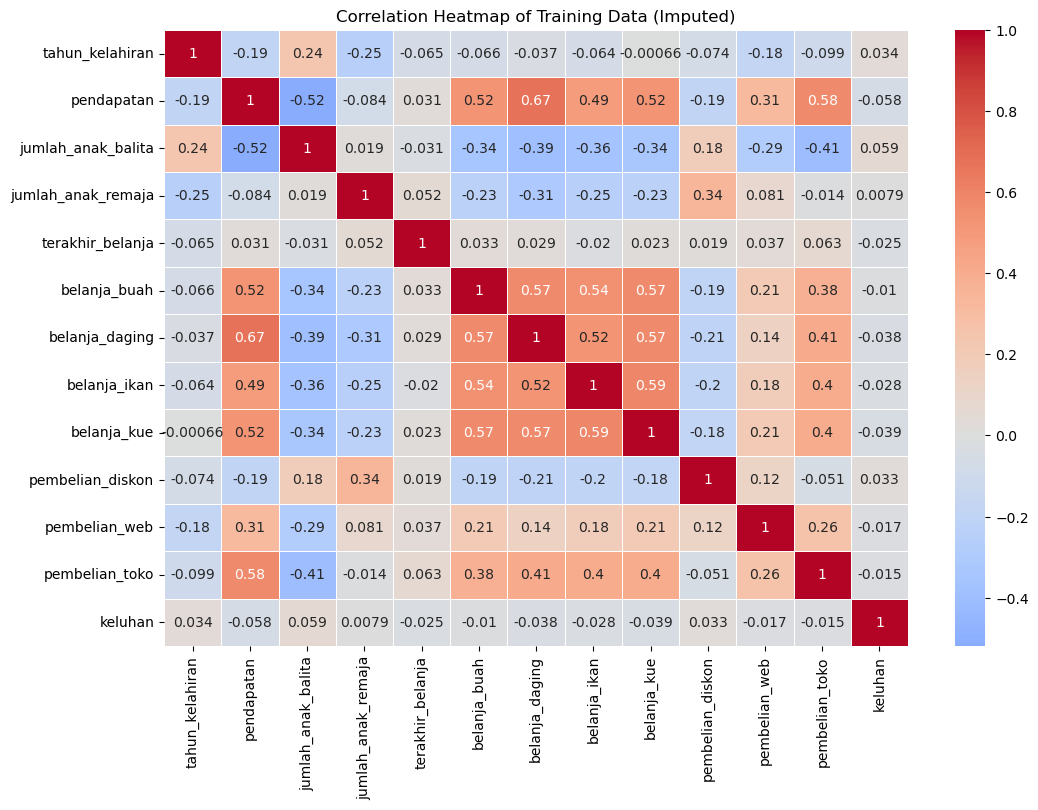

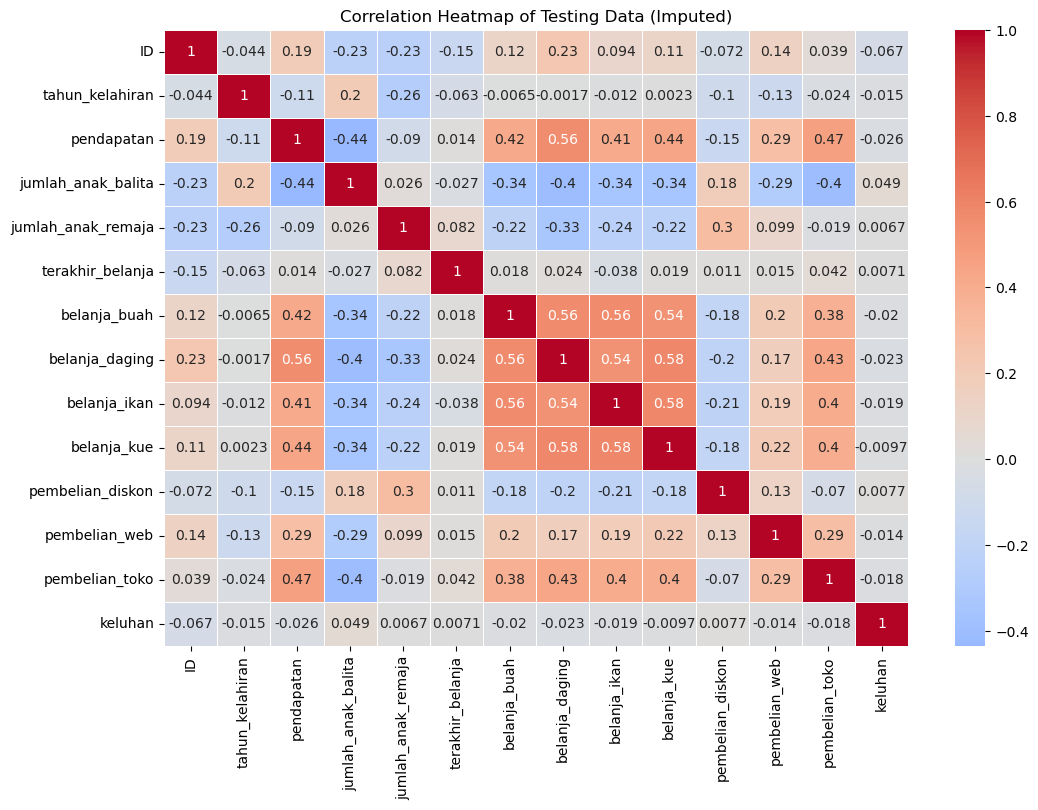

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_imputed = train_data.copy()
test_imputed = test_data.copy()

print("Train data head:\n", train_data.head())
print("Test data head:\n", test_data.head())
print("Train labels head:\n", train_labels.head())

train_stats = train_data.describe(include='all')
test_stats = test_data.describe(include='all')

train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

print("\nTrain data missing values Sebelum imputasi:\n", train_missing)
print("\nTest data missing values Sebelum imputasi:\n", test_missing)

numerical_features = ['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 
                      'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 
                      'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko']
categorical_features = ['pendidikan', 'status_pernikahan']

for feature in numerical_features:
    median_train = train_imputed[feature].median()
    train_imputed[feature].fillna(median_train, inplace=True)
    test_imputed[feature].fillna(median_train, inplace=True)  

for feature in categorical_features:
    mode_train = train_imputed[feature].mode()[0]
    train_imputed[feature].fillna(mode_train, inplace=True)
    test_imputed[feature].fillna(mode_train, inplace=True)

train_missing_after = train_imputed.isnull().sum()
test_missing_after = test_imputed.isnull().sum()

print("\nTrain data missing values Sesudah imputasi:\n", train_missing_after)
print("\nTest data missing values Sesudah imputasi:\n", test_missing_after)

missing_values_comparison = pd.DataFrame({
    'Train Missing (Sebelum)': train_missing,
    'Train Missing (Sesudah)': train_missing_after,
    'Test Missing (Sebelum)': test_missing,
    'Test Missing (Sesudah)': test_missing_after
})
print("\nMissing Values Comparison:\n", missing_values_comparison)

plt.figure(figsize=(12, 8))
train_corr = train_imputed.corr(numeric_only=True)
sns.heatmap(train_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Training Data (Imputed)')
plt.show()

plt.figure(figsize=(12, 8))
test_corr = test_imputed.corr(numeric_only=True)
sns.heatmap(test_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Testing Data (Imputed)')
plt.show()


### Deskripsi analisis singkat untuk masing-masing perbandingan antara data train dan test berikut:

### **1. Struktur Data** : Data train dan test hampir sama, kecuali untuk kolom target "jumlah_promosi" yang hanya ada di data train dan kolom "ID" yang hanya ada di data test. Meskipun demikian, keduanya memiliki kolom-kolom serupa, seperti "tahun_kelahiran", "pendidikan", dan "fitur belanja", yang memungkinkan model yang dilatih pada data train untuk diuji menggunakan data test tanpa melakukan penyesuaian tambahan.

### **2. Perbandingan nilai hilang sebelum imputasi** : Kedua dataset menunjukkan nilai hilang yang signifikan sebelum imputasi. Data train mencatat 189 nilai hilang di pendidikan dan 190 di pendapatan, sementara data test mencatat 204 dan 203 nilai hilang pada kolom yang sama. Jumlah nilai hilang yang sedikit lebih tinggi menunjukkan bahwa data test kurang lengkap dan perlu diperhatikan untuk kualitas data sebelum pelatihan model.

### **3. Perbandingan Missing Values Setelah Imputasi** : Sebagian besar fitur di kedua dataset tidak lagi kekurangan nilai setelah imputasi. Proses imputasi berhasil mengatasi sebagian besar nilai hilang di keluhan dan tanggal_menjadi_anggota, sedangkan data uji hanya tersisa 193 dan 2759. Namun, fitur dengan nilai hilang masih perlu diperhatikan dalam analisis lebih lanjut.

### **4. Distribusi Missing Values dan Implikasi Imputasi** : Pada kedua dataset, fitur tanggal_menjadi_anggota memiliki nilai yang sangat kurang, 2752 di data train dan 2759 di data test. Hal ini menunjukkan bahwa banyak pengguna tidak memberikan informasi ini, jadi fitur harus diurus dengan hati-hati. Selain itu, keluhan juga tidak memiliki nilai pasca-imputasi, sehingga pendekatan khusus diperlukan untuk menangani fitur-fitur ini; ini dapat mencakup imputasi yang lebih kompleks atau menghapusnya jika tidak relevan.

### **5. Analisis Korelasi** : Terdapat banyak hubungan signifikan yang konsisten di kedua dataset, seperti yang ditunjukkan oleh analisis korelasi antara data train dan test yang didasarkan pada heatmap. Dalam pengembangan model, fitur yang menunjukkan korelasi yang kuat, terutama antara pendapatan dan pengeluaran, harus menjadi fokus. Variasi dalam kekuatan korelasi antara fitur juga menunjukkan bagaimana karakteristik pengguna mungkin berbeda antara kedua dataset, yang perlu diperhatikan untuk menghasilkan model yang akurat dan efisien.

### **6. Kesimpulan Umum Perbandingan Data Train dan Test** : Meskipun ada masalah dengan nilai yang tidak ada, karakteristik kedua dataset tetap sama setelah imputasi. Ini menunjukkan bahwa model yang dilatih di data train dapat melakukan generalisasi baik di data test maupun di data latihan. Tanggal_menjadi_anggota, sebaliknya, memerlukan manajemen data yang lebih baik. Berdasarkan data yang telah diproses, analisis ini memungkinkan kita untuk melanjutkan pembangunan model yang lebih efisien.